# Homework 08

In this assignment, you will demonstrate your learning about creating data visualizations in Python using Seaborn. When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct and all visualizations are visible before saving and submitting your .ipynb file (the notebook file) on gradescope.

We will work with the `university_data.csv` dataset imported into the `uni` DataFrame below. We then preview the first few rows. It contains information about 311 universities in the United States including average student test scores and gpa, tuition costs, the state in which the school is located, the ranking, etc.

**Note: There are no automated tests for this notebook because it is all about your skills at creating visualizations.**

In [1]:
# Run but do not modify this code
import seaborn as sns
import pandas as pd
sns.set_theme()
uni = pd.read_csv("university_data.csv")
print(uni.shape)
uni.head()

(311, 13)


,act_avg,sat_avg,enrollment,city,acceptance_rate,percent_receiving_aid,cost_after_aid,state,hs_gpa_avg,tuition,Institution_name,institution_type,us_rank
0,32.0,1400.0,5400.0,Princeton,7.0,60.0,16793.0,NJ,3.9,47140,Princeton University,private,1.0
1,32.0,1430.0,6710.0,Cambridge,5.0,55.0,16338.0,MA,4.0,48949,Harvard University,private,2.0
2,32.0,1450.0,5941.0,Chicago,8.0,42.0,27767.0,IL,4.0,54825,University of Chicago,private,3.0
3,32.0,1420.0,5472.0,New Haven,6.0,50.0,18385.0,CT,NaN,51400,Yale University,private,3.0
4,32.0,1430.0,6113.0,New York,6.0,48.0,21041.0,NY,NaN,57208,Columbia University,private,5.0


### Question 1
1. Generate a scatterplot of `tuition` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis.
2. Generate the same scatterplot as in step 1, but color the points according to `institution_type`.
3. Briefly interpret the visualizations you created in steps 1 and 2. What does it show about the correlation between `tuition` and `sat_avg`? About the difference between `public` and `private` institutions? Put your answer in "Answer 1" cell.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1
manual: true
points: 12
-->

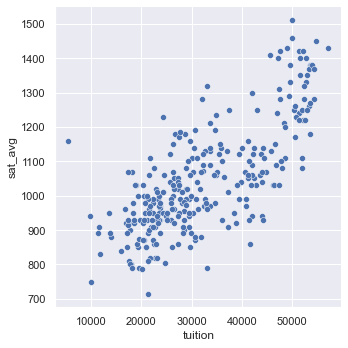

In [2]:
# Put your code for question 1.1 here
sns.relplot(data=uni,x='tuition',y='sat_avg')

<!-- END QUESTION -->

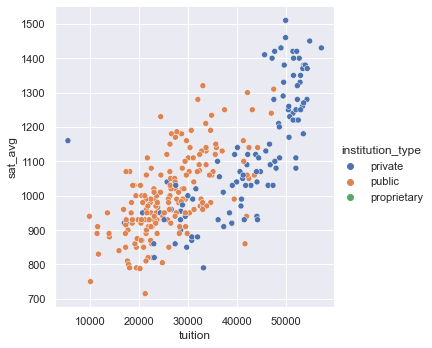

In [3]:
# Put your code for question 1.2 here
sns.relplot(data=uni,x='tuition',y='sat_avg',hue='institution_type')

### Answer 1

sat_avg and tutition appear to have a positive correlation: the higher your sat_avg is, the higher your tuition is as well. When separated by institution_type, both private and public institutions follow the trend. However, public institutions don't have many people above and sat_avg of 1300. When these points are removed, then it seems that public institutions have higher sat_avg and lower tuitions than private institutions. 

### Question 2.1

Below, we plot a histogram of `hs_gpa_avg`, the average high school gpa, for the schools. We set the `bins` manually. Identify at least two problems with our setting of `bins` that make the histogram difficult to read and or misleading. You do not need to replot the histogram to answer this question, but you are welcome to modify the `bins` parameter to see what different settings would give you in the visualization. Put your answer in "Answer 2.1" cell.

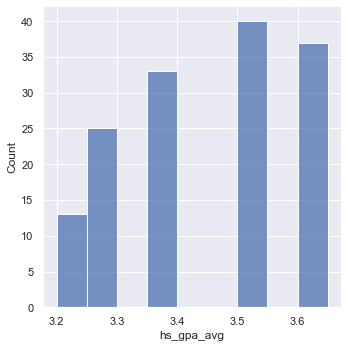

In [4]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", bins=[3.2 + 0.05*i for i in range(10)])

### Answer 2.1

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_1
manual: true
points: 4
-->

1) The bins start at 3.2, this makes it seem like there are no GPAs below that, which is incorrect.
2) The bins end at 3.6, which make it seem like 3.6 is the highest gpa. This is wrong because there are actuallly a large amount of 3.6+ GPAs
3) The bin size is too small which causes there to be a lot of gaps in the histogram. This makes it harder to read.

<!-- END QUESTION -->



### Question 2.2

Below we plot a heat map that visualizes the relationship between `hs_gpa_avg` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis. It looks like there is a strong relationship between `hs_gpa_avg` and `sat_avg`. Suppose someone interprets this plot by saying "Look, every student who has a good high school gpa of 3.75 or above gets a SAT score of at least 900 or so." Why is this not necessarily true? Put your answer in "Answer 2.2" cell.

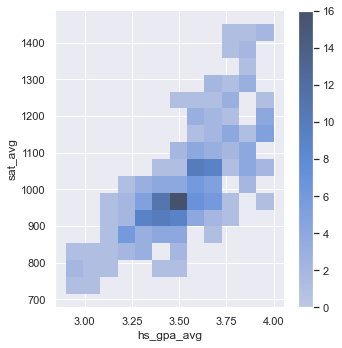

In [5]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", y="sat_avg", cbar=True)

### Answer 2.2

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_2
manual: true
points: 4
-->

This is an incorrect interpretation, because sat_avg and hs_gpa_avg are averages of an entire college. For the college that has an sat_avg of 900 and hs_gpa_avg of 3.75, is very likely that the school has people who had lower than 900 sat scores even though they had a 3.75 gpa. 

<!-- END QUESTION -->



### Question 3
1. Generate a bar plot showing the difference in the distribution of `hs_gpa_avg` between `public` and `private` schools. That is, there should be two bars showing the average values of `hs_gpa_avg` for `public` vs. `private` schools. There are a small number of `proprietary` schools in the dataset which are missing data in this category; filter those out so they do not appear in this visualization.
2. Visualize the same information as in step 1, but using a box plot to visualize the distributions. As in step 1, do not include `proprietary` schools in the visualization. Briefly interpret your results, especially explaining what information the box plot visualizes that was not clear in the earlier bar plot. Explain in "Answer 3" cell.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3
manual: true
points: 12
-->

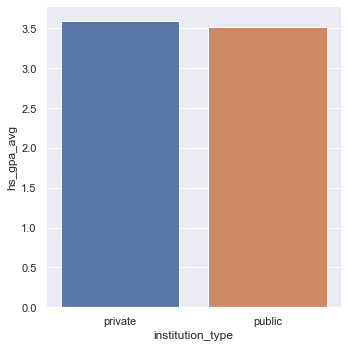

In [6]:
# Put your code for 3.1 here
meanpubPriv = uni[(uni['institution_type']=='public') | (uni['institution_type']=='private')].groupby('institution_type').mean().reset_index()
# print(meanpubPriv)
sns.catplot(data=meanpubPriv,x='institution_type',y='hs_gpa_avg',kind='bar')

<!-- END QUESTION -->

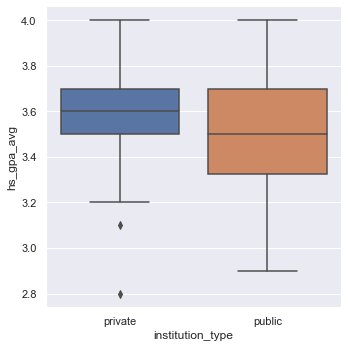

In [7]:
# Put your code for 3.2 here
pubPriv = uni[(uni['institution_type']=='public') | (uni['institution_type']=='private')]
sns.catplot(data=pubPriv,x='institution_type',y='hs_gpa_avg',kind='box')

### Answer 3

Both plots show that private institutions tend to have higher hs_gpa_avg. The box plot shows that public institutions tend to have a more diverse spread of hs_gpa_avg. 50% of private institutions have a hs_gpa_avg between 3.2 and 4.0, whereas 50% of public institutions have a hs_gpa_avg between 2.9 and 4.0.

### Question 4
1. Generate a line plot of `us_rank` on the horizontal `x` axis and `tuition` on the vertical `y` axis. 
2. In a single figure, plot the same line as in step 2 in one color and another line for `cost_after_aid` on the vertical `y` axis in a different color. Use the same `us_rank` ordering on the horizontal `x` axis for both. Note that you may need to wrangle your data somewhat to produce this on the same plot rather than directly using the `uni` dataframe.
3. In step 2 we plotted `tuition` and `cost_after_aid` on the same vertical `y` axis. Briefly explain why that was reasonable, but it would not make sense to plot `tuition` and `enrollment` on the same vertical `y` axis in the same way. Explain in "Answer 4" cell.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4
manual: true
points: 12
-->

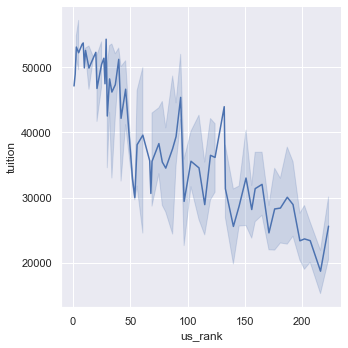

In [8]:
# Put your code for 4.1 here
sns.relplot(data=uni,x='us_rank',y='tuition',kind='line')

<!-- END QUESTION -->

C:\Users\fuzzi\AppData\Local\Temp/ipykernel_19532/2734156470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuition_df['cost_type'] = 'tuition'
C:\Users\fuzzi\AppData\Local\Temp/ipykernel_19532/2734156470.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aid_df['cost_type'] = 'cost_after_aid'


        cost  us_rank       cost_type
0    47140.0      1.0         tuition
1    48949.0      2.0         tuition
2    54825.0      3.0         tuition
3    51400.0      3.0         tuition
4    57208.0      5.0         tuition
..       ...      ...             ...
617   9000.0      NaN  cost_after_aid
618  12416.0      NaN  cost_after_aid
619   9690.0      NaN  cost_after_aid
620  12075.0      NaN  cost_after_aid
621  10940.0      NaN  cost_after_aid

[622 rows x 3 columns]


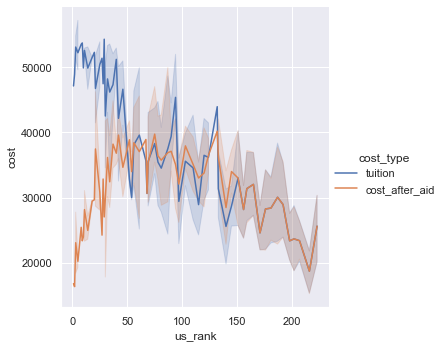

In [9]:
# Put your code for 4.2 here
tuition_df = uni[['tuition','us_rank']]
tuition_df['cost_type'] = 'tuition'
tuition_df=tuition_df.rename(columns={"tuition":"cost"})

aid_df = uni
aid_df['cost_after_aid'].fillna(aid_df['tuition'],inplace=True)
aid_df = aid_df[['cost_after_aid','us_rank']]
aid_df['cost_type'] = 'cost_after_aid'
aid_df=aid_df.rename(columns={"cost_after_aid":"cost"})

cost_df = pd.concat([tuition_df,aid_df],ignore_index=True)
print(cost_df)

sns.relplot(data=cost_df,x='us_rank',y='cost',kind='line',hue='cost_type')

### Answer 4

It's reasonable because tuition and cost_after_aid share a dependent variable: cost. Enrollment would have a dependent variable of number of people, which isn't the same as tuition.

### Question 5
Inside of the homework folder we include an image `state_enrollments_fig.png` that visualizes the total enrollment of all of the universities in the `uni` dataset grouped by state. It is a horizontal bar plot that is sorted by the values from greatest to least. It was generated by manipulating the `uni` dataset with Pandas and then plotting with Seaborn.

Create a similar visualization, except instead of just visualizing total enrollment by state, visualize total enrollment per capita by state. That is, for each state, calculate the total enrollment in that state across all universities in the `uni` dataset, and then divide by that state's population. You can find the state populations as of the 2010 census in the `state_pops.csv` dataset, which uses the same two letter abbreviations for state names as the `uni` dataset.

Some tips on making your plot look like `state_enrollments_fig.png`:
- To prevent the image being "squashed" vertically, set the `height` parameter of the Seaborn plot call to `10`. 
- To simplify the colors to be gray rather than a rainbow, set the `color` parameter to `"gray"`.
- To make the bar plot horizontal, use the numerical variable (in this case enrollment per capita) for the horizontal `x` axis in Seaborn and the categorical variable (in this case the state name) for the vertical `y` axis.
- To sort the bars, you can either [sort the dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) according to the appropriate values before plotting or you can compute the ordering and then pass it to [the Seaborn order parameter](https://seaborn.pydata.org/generated/seaborn.catplot.html).

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5
manual: true
points: 4
-->

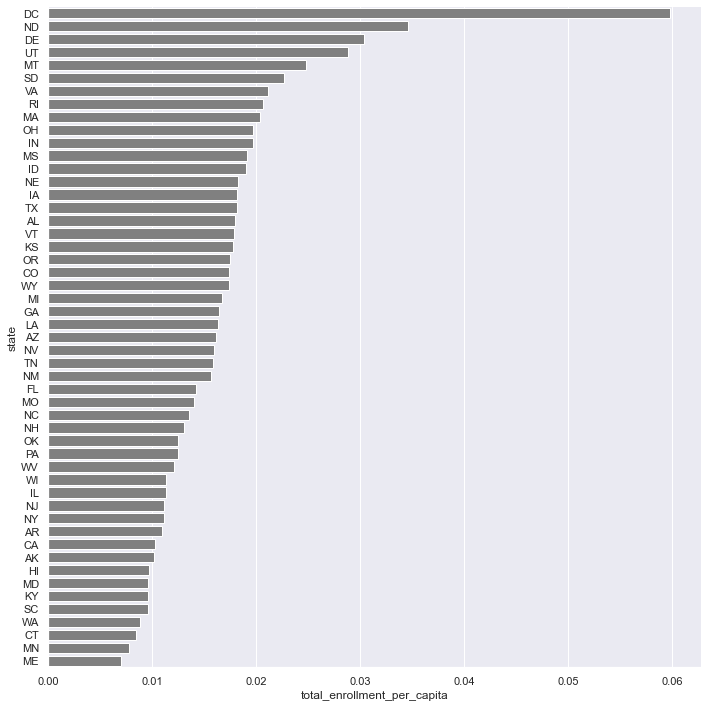

In [10]:
# Put your code here for problem 5
# Feel free to add additional cells
statePop = pd.read_csv("state_pops.csv")

stateSums = uni.groupby('state')['enrollment'].sum().reset_index()
statePerCapita = pd.merge(stateSums,statePop, on='state')
statePerCapita['total_enrollment_per_capita']=statePerCapita['enrollment']/statePerCapita['population_2010']
statePerCapita=statePerCapita.sort_values(by=['total_enrollment_per_capita'],ascending=False)
statePerCapita

sns.catplot(data=statePerCapita,y='state',x='total_enrollment_per_capita',kind='bar',
            height=10,color='grey')



<!-- END QUESTION -->

In [11]:
# uni
# statePop

When you finish remember to go to Kernel --> Restart and Run All, and then double check that your notebook looks correct and all visualizations are visible before saving and submitting your .ipynb file (the notebook file) on gradescope.